### Libraries

In [1]:
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt

### Macroeconomics key measures

In [2]:
fred = Fred(api_key = '75bc7bde0bed5711cc22e67e7f54ed79')

In [3]:
indicators_name = ["CPI INDEX", "UNEMPLOYMENT RATE", "REAL GDP", "POTENTIAL REAL GDP", "FED FUND EFFECTIVE RATE"]
indicators_code = ["CPIAUCSL", 'UNRATE', 'GDPC1', 'GDPPOT', 'FEDFUNDS']

In [4]:
def get_fredapidata(indicators_name, indicators_code):
    dict_indicator = {}
    
    for indicator_n, indicator_c in zip(indicators_name, indicators_code) :
        dict_indicator[indicator_n] = fred.get_series(series_id = indicator_c)
    
    df = pd.DataFrame.from_dict(dict_indicator)
    
    return df

In [5]:
df = get_fredapidata(indicators_name, indicators_code)
df

,CPI INDEX,UNEMPLOYMENT RATE,REAL GDP,POTENTIAL REAL GDP,FED FUND EFFECTIVE RATE
1947-01-01,21.48,NaN,2182.681,NaN,NaN
1947-02-01,21.62,NaN,NaN,NaN,NaN
1947-03-01,22.00,NaN,NaN,NaN,NaN
1947-04-01,22.00,NaN,2176.892,NaN,NaN
1947-05-01,21.95,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2033-10-01,NaN,NaN,NaN,27588.28,NaN
2034-01-01,NaN,NaN,NaN,27712.65,NaN
2034-04-01,NaN,NaN,NaN,27837.22,NaN
2034-07-01,NaN,NaN,NaN,27961.07,NaN


In [6]:
df["OUTPUT GAP"] = ((df["REAL GDP"] - df["POTENTIAL REAL GDP"]) / df["POTENTIAL REAL GDP"])

<Axes: >

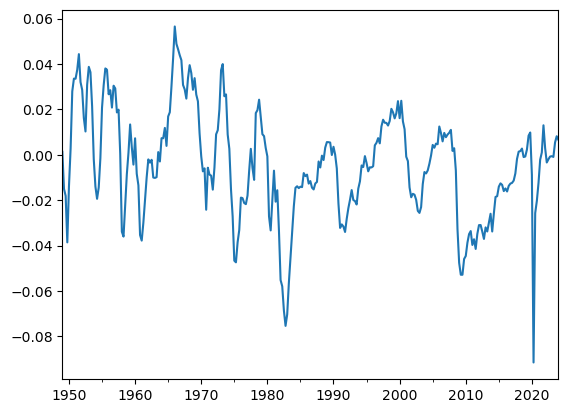

In [7]:
df["OUTPUT GAP"].dropna().plot()

<Axes: >

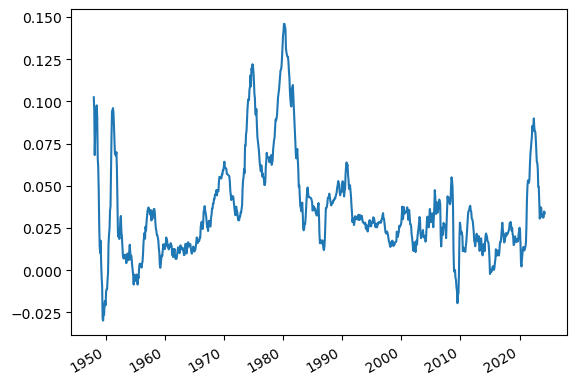

In [8]:
df["CPI YoY"] = df["CPI INDEX"].pct_change(periods = 12, fill_method = None)
df["CPI YoY"].plot()

In [9]:
df["REAL GDP QoQ"] = df["REAL GDP"].dropna().pct_change()
df["REAL GDP YoY"] = df["REAL GDP"].dropna().pct_change(periods = 4, fill_method = None)
df["POTENTIAL REAL GDP QoQ"] = df["POTENTIAL REAL GDP"].dropna().pct_change()
df["POTENTIAL REAL GDP YoY"] = df["POTENTIAL REAL GDP"].dropna().pct_change(periods = 4, fill_method = None)

In [10]:
df

,CPI INDEX,UNEMPLOYMENT RATE,REAL GDP,POTENTIAL REAL GDP,FED FUND EFFECTIVE RATE,OUTPUT GAP,CPI YoY,REAL GDP QoQ,REAL GDP YoY,POTENTIAL REAL GDP QoQ,POTENTIAL REAL GDP YoY
1947-01-01,21.48,NaN,2182.681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-02-01,21.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-03-01,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-04-01,22.00,NaN,2176.892,NaN,NaN,NaN,NaN,-0.002652,NaN,NaN,NaN
1947-05-01,21.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2033-10-01,NaN,NaN,NaN,27588.28,NaN,NaN,NaN,NaN,NaN,0.004549,0.018494
2034-01-01,NaN,NaN,NaN,27712.65,NaN,NaN,NaN,NaN,NaN,0.004508,0.018369
2034-04-01,NaN,NaN,NaN,27837.22,NaN,NaN,NaN,NaN,NaN,0.004495,0.018252
2034-07-01,NaN,NaN,NaN,27961.07,NaN,NaN,NaN,NaN,NaN,0.004449,0.018123


Text(0.5, 1.0, 'OUTPUT GAP')

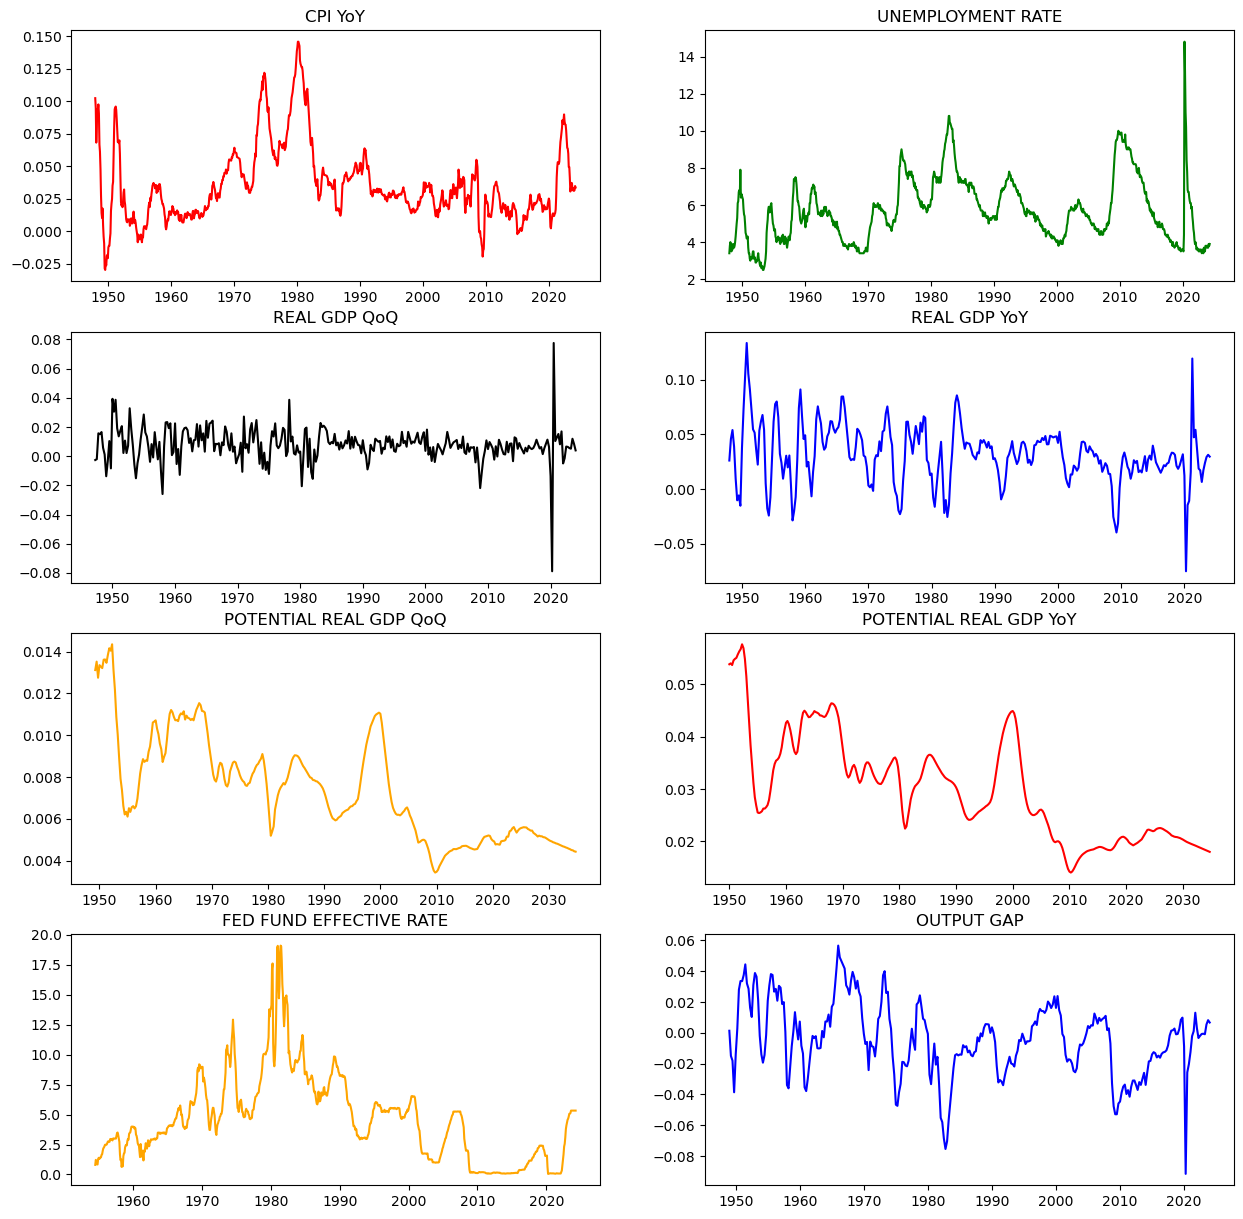

In [11]:
fig, axs = plt.subplots(4, 2, figsize = (15, 15))
axs[0, 0].plot(df["CPI YoY"].dropna(), color = "red")
axs[0, 0].set_title("CPI YoY")
axs[0, 1].plot(df["UNEMPLOYMENT RATE"].dropna(), color = "green")
axs[0, 1].set_title("UNEMPLOYMENT RATE")
axs[1, 0].plot(df["REAL GDP QoQ"].dropna(), color = "black")
axs[1, 0].set_title("REAL GDP QoQ")
axs[1, 1].plot(df["REAL GDP YoY"].dropna(), color = "blue")
axs[1, 1].set_title("REAL GDP YoY")
axs[2, 0].plot(df["POTENTIAL REAL GDP QoQ"].dropna(), color = "orange")
axs[2, 0].set_title("POTENTIAL REAL GDP QoQ")
axs[2, 1].plot(df["POTENTIAL REAL GDP YoY"].dropna(), color = "red")
axs[2, 1].set_title("POTENTIAL REAL GDP YoY")
axs[3, 0].plot(df["FED FUND EFFECTIVE RATE"].dropna(), color = "orange")
axs[3, 0].set_title("FED FUND EFFECTIVE RATE")
axs[3, 1].plot(df["OUTPUT GAP"].dropna(), color = "blue")
axs[3, 1].set_title("OUTPUT GAP")

### Study of Bond Term Structure

In [12]:
rate_codes = ["DGS1MO", "DGS3MO", "DGS6MO", "DGS1", "DGS2", "DGS5", "DGS7", "DGS10", "DGS20", "DGS30"]
rate_names = ["US_1M", "US_3M", "US_6M", "US_1Y", "US_2Y", "US_5Y", "US_7Y", "US_10Y", "US_20Y", "US_30Y"]
df_rates = get_fredapidata(rate_names, rate_codes)

In [13]:
df_rates

,US_1M,US_3M,US_6M,US_1Y,US_2Y,US_5Y,US_7Y,US_10Y,US_20Y,US_30Y
1962-01-02,NaN,NaN,NaN,3.22,NaN,3.88,NaN,4.06,4.07,NaN
1962-01-03,NaN,NaN,NaN,3.24,NaN,3.87,NaN,4.03,4.07,NaN
1962-01-04,NaN,NaN,NaN,3.24,NaN,3.86,NaN,3.99,4.06,NaN
1962-01-05,NaN,NaN,NaN,3.26,NaN,3.89,NaN,4.02,4.07,NaN
1962-01-08,NaN,NaN,NaN,3.31,NaN,3.91,NaN,4.03,4.08,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-05-17,5.50,5.46,5.41,5.14,4.83,4.44,4.43,4.42,4.66,4.56
2024-05-20,5.50,5.45,5.43,5.15,4.82,4.46,4.44,4.44,4.68,4.58
2024-05-21,5.50,5.45,5.42,5.14,4.82,4.43,4.42,4.41,4.65,4.55
2024-05-22,5.49,5.45,5.43,5.16,4.86,4.47,4.44,4.43,4.63,4.55


<Axes: >

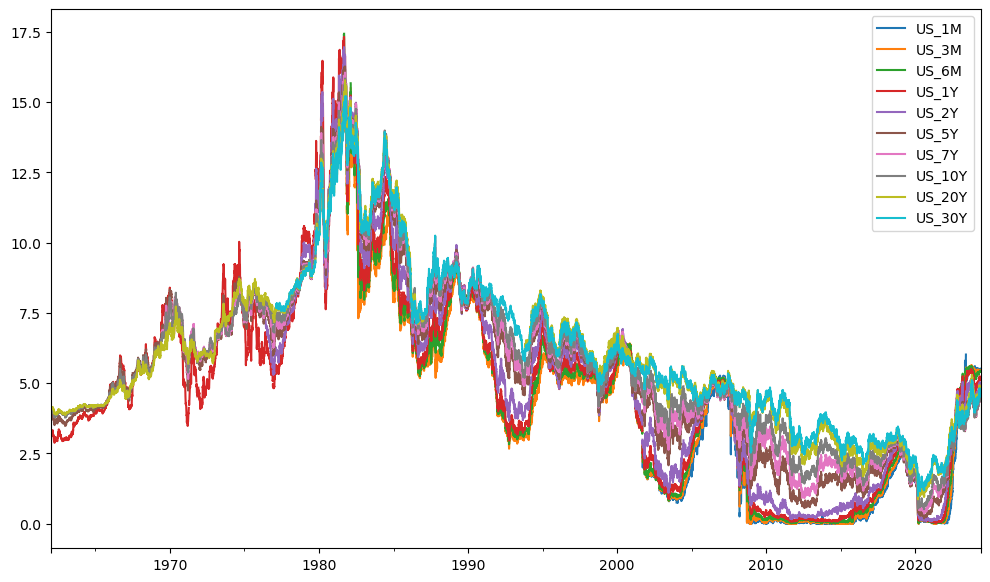

In [14]:
df_rates.plot(figsize = (12, 7))

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

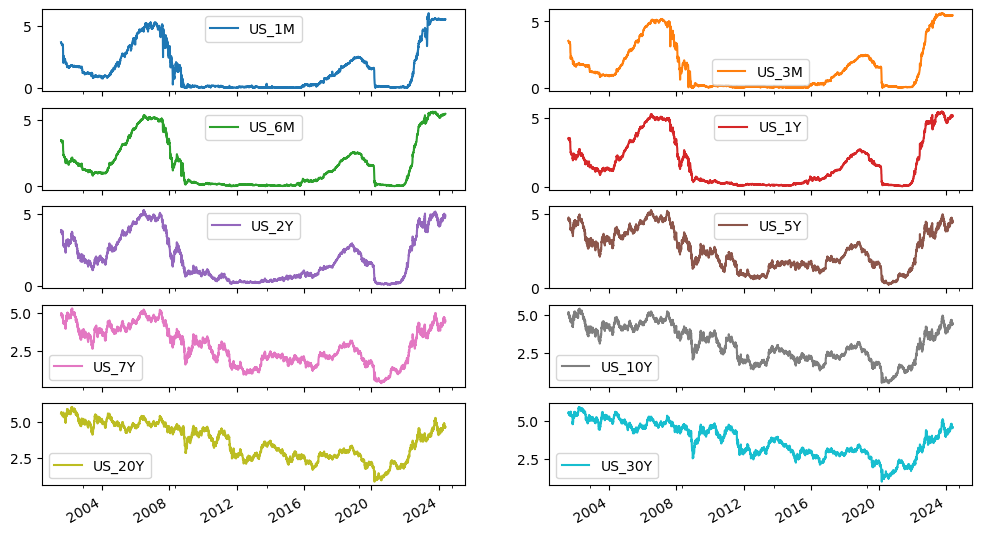

In [15]:
df_rates.dropna().plot(subplots = True, layout = (5, 2), figsize = (12, 7))

#### The `get_slope_strategy` function calculates the slope between different pairs of interest rates from a DataFrame of government bond yields.

In [16]:
def get_slope_strategy(df_rates, rate_names):
    dicti = {}
    for i in range(len(rate_names)-1):
        for j in range(i+1, len(rate_names)):
            dicti[rate_names[i] + "/" + rate_names[j]] = df_rates[rate_names[j]] - df_rates[rate_names[i]]
    
    df_slope_strategy = pd.DataFrame(dicti)
    
    return df_slope_strategy

In [17]:
get_slope_strategy(df_rates, rate_names).dropna()

,US_1M/US_3M,US_1M/US_6M,US_1M/US_1Y,US_1M/US_2Y,US_1M/US_5Y,US_1M/US_7Y,US_1M/US_10Y,US_1M/US_20Y,US_1M/US_30Y,US_3M/US_6M,...,US_5Y/US_7Y,US_5Y/US_10Y,US_5Y/US_20Y,US_5Y/US_30Y,US_7Y/US_10Y,US_7Y/US_20Y,US_7Y/US_30Y,US_10Y/US_20Y,US_10Y/US_30Y,US_20Y/US_30Y
2001-07-31,-0.13,-0.20,-0.14,0.12,0.90,1.19,1.40,1.94,1.84,-0.07,...,0.29,0.50,1.04,0.94,0.21,0.75,0.65,0.54,0.44,-0.10
2001-08-01,-0.12,-0.18,-0.09,0.18,0.97,1.25,1.46,1.98,1.88,-0.06,...,0.28,0.49,1.01,0.91,0.21,0.73,0.63,0.52,0.42,-0.10
2001-08-02,-0.12,-0.19,-0.08,0.24,1.04,1.32,1.52,2.03,1.92,-0.07,...,0.28,0.48,0.99,0.88,0.20,0.71,0.60,0.51,0.40,-0.11
2001-08-03,-0.11,-0.16,-0.06,0.28,1.09,1.36,1.57,2.07,1.96,-0.05,...,0.27,0.48,0.98,0.87,0.21,0.71,0.60,0.50,0.39,-0.11
2001-08-06,-0.10,-0.15,-0.06,0.26,1.09,1.37,1.57,2.08,1.97,-0.05,...,0.28,0.48,0.99,0.88,0.20,0.71,0.60,0.51,0.40,-0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-17,-0.04,-0.09,-0.36,-0.67,-1.06,-1.07,-1.08,-0.84,-0.94,-0.05,...,-0.01,-0.02,0.22,0.12,-0.01,0.23,0.13,0.24,0.14,-0.10
2024-05-20,-0.05,-0.07,-0.35,-0.68,-1.04,-1.06,-1.06,-0.82,-0.92,-0.02,...,-0.02,-0.02,0.22,0.12,0.00,0.24,0.14,0.24,0.14,-0.10
2024-05-21,-0.05,-0.08,-0.36,-0.68,-1.07,-1.08,-1.09,-0.85,-0.95,-0.03,...,-0.01,-0.02,0.22,0.12,-0.01,0.23,0.13,0.24,0.14,-0.10
2024-05-22,-0.04,-0.06,-0.33,-0.63,-1.02,-1.05,-1.06,-0.86,-0.94,-0.02,...,-0.03,-0.04,0.16,0.08,-0.01,0.19,0.11,0.20,0.12,-0.08


#### The `get_fly_strategy` function calculates the "butterfly spread" between different sets of interest rates from a DataFrame of government bond yields.

In [18]:
def get_fly_strategy(df_rates, rate_names):
    dicti = {}
    for i in range(len(rate_names)-2):
        for k in range(i+1, len(rate_names)-1):
            for j in range(k+1, len(rate_names)):
                dicti[rate_names[i] + "/2x" + rate_names[k] + "/" + rate_names[j]] = df_rates[rate_names[i]] - 2* df_rates[rate_names[k]] + df_rates[rate_names[j]]
                
    df_fly_strategy = pd.DataFrame(dicti)

    return df_fly_strategy  

In [19]:
get_fly_strategy(df_rates, rate_names).dropna()

,US_1M/2xUS_3M/US_6M,US_1M/2xUS_3M/US_1Y,US_1M/2xUS_3M/US_2Y,US_1M/2xUS_3M/US_5Y,US_1M/2xUS_3M/US_7Y,US_1M/2xUS_3M/US_10Y,US_1M/2xUS_3M/US_20Y,US_1M/2xUS_3M/US_30Y,US_1M/2xUS_6M/US_1Y,US_1M/2xUS_6M/US_2Y,...,US_5Y/2xUS_7Y/US_10Y,US_5Y/2xUS_7Y/US_20Y,US_5Y/2xUS_7Y/US_30Y,US_5Y/2xUS_10Y/US_20Y,US_5Y/2xUS_10Y/US_30Y,US_5Y/2xUS_20Y/US_30Y,US_7Y/2xUS_10Y/US_20Y,US_7Y/2xUS_10Y/US_30Y,US_7Y/2xUS_20Y/US_30Y,US_10Y/2xUS_20Y/US_30Y
2001-07-31,0.06,0.12,0.38,1.16,1.45,1.66,2.20,2.10,0.26,0.52,...,-8.000000e-02,0.46,0.36,0.04,-0.06,-1.14,0.33,0.23,-0.85,-0.64
2001-08-01,0.06,0.15,0.42,1.21,1.49,1.70,2.22,2.12,0.27,0.54,...,-7.000000e-02,0.45,0.35,0.03,-0.07,-1.11,0.31,0.21,-0.83,-0.62
2001-08-02,0.05,0.16,0.48,1.28,1.56,1.76,2.27,2.16,0.30,0.62,...,-8.000000e-02,0.43,0.32,0.03,-0.08,-1.10,0.31,0.20,-0.82,-0.62
2001-08-03,0.06,0.16,0.50,1.31,1.58,1.79,2.29,2.18,0.26,0.60,...,-6.000000e-02,0.44,0.33,0.02,-0.09,-1.09,0.29,0.18,-0.82,-0.61
2001-08-06,0.05,0.14,0.46,1.29,1.57,1.77,2.28,2.17,0.24,0.56,...,-8.000000e-02,0.43,0.32,0.03,-0.08,-1.10,0.31,0.20,-0.82,-0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-17,-0.01,-0.28,-0.59,-0.98,-0.99,-1.00,-0.76,-0.86,-0.18,-0.49,...,8.881784e-16,0.24,0.14,0.26,0.16,-0.32,0.25,0.15,-0.33,-0.34
2024-05-20,0.03,-0.25,-0.58,-0.94,-0.96,-0.96,-0.72,-0.82,-0.21,-0.54,...,2.000000e-02,0.26,0.16,0.26,0.16,-0.32,0.24,0.14,-0.34,-0.34
2024-05-21,0.02,-0.26,-0.58,-0.97,-0.98,-0.99,-0.75,-0.85,-0.20,-0.52,...,0.000000e+00,0.24,0.14,0.26,0.16,-0.32,0.25,0.15,-0.33,-0.34
2024-05-22,0.02,-0.25,-0.55,-0.94,-0.97,-0.98,-0.78,-0.86,-0.21,-0.51,...,2.000000e-02,0.22,0.14,0.24,0.16,-0.24,0.21,0.13,-0.27,-0.28


In [20]:
df_slopes = pd.concat([get_slope_strategy(df_rates, rate_names)["US_3M/US_10Y"], get_slope_strategy(df_rates, rate_names)["US_2Y/US_10Y"], get_slope_strategy(df_rates, rate_names)["US_2Y/US_5Y"]], axis = 1)
mean_US3M_US10Y = get_slope_strategy(df_rates, rate_names)["US_3M/US_10Y"].mean()
mean_US2Y_US10Y =get_slope_strategy(df_rates, rate_names)["US_2Y/US_10Y"].mean()
mean_US2Y_US5Y =get_slope_strategy(df_rates, rate_names)["US_2Y/US_5Y"].mean()

Text(0.5, 1.0, 'Most Popular Slope Strategies')

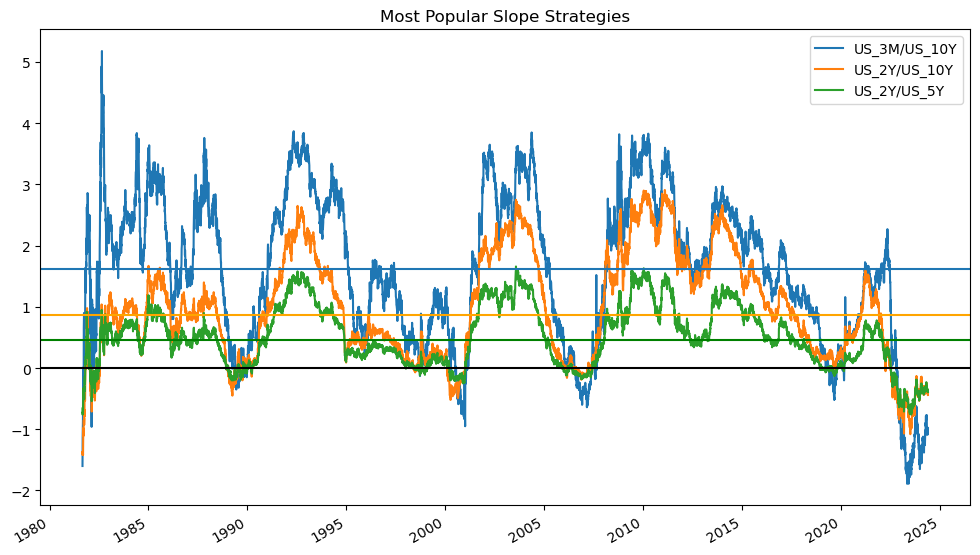

In [46]:
df_slopes.dropna().plot(figsize = (12, 7))
plt.axhline(y = 0, color = "black")
plt.axhline(y = mean_US3M_US10Y)
plt.axhline(y = mean_US2Y_US10Y, color = "orange")
plt.axhline(y = mean_US2Y_US5Y, color = "green")
plt.title("Most Popular Slope Strategies")

#### Those measures are mean reverse measures. The blue horizontal line represents the mean value of the slope strategy US_3M/US_10Y, the orange horizontal line represents the mean value of the slope strategy US_2Y/US_10Y and the green horizontal line represents the mean value of the slope strategy US_2Y/US_5Y

In [45]:
df_flys_trategies = pd.concat( [get_fly_strategy(df_rates, rate_names)["US_6M/2xUS_1Y/US_2Y"], get_fly_strategy(df_rates, rate_names)["US_2Y/2xUS_5Y/US_10Y"]], axis = 1)
mean_US_6M_2xUS_1Y_US_2Y = get_fly_strategy(df_rates, rate_names)["US_6M/2xUS_1Y/US_2Y"].mean()
mean_US_2Y_2xUS_5Y_US_10Y = get_fly_strategy(df_rates, rate_names)["US_2Y/2xUS_5Y/US_10Y"].mean()

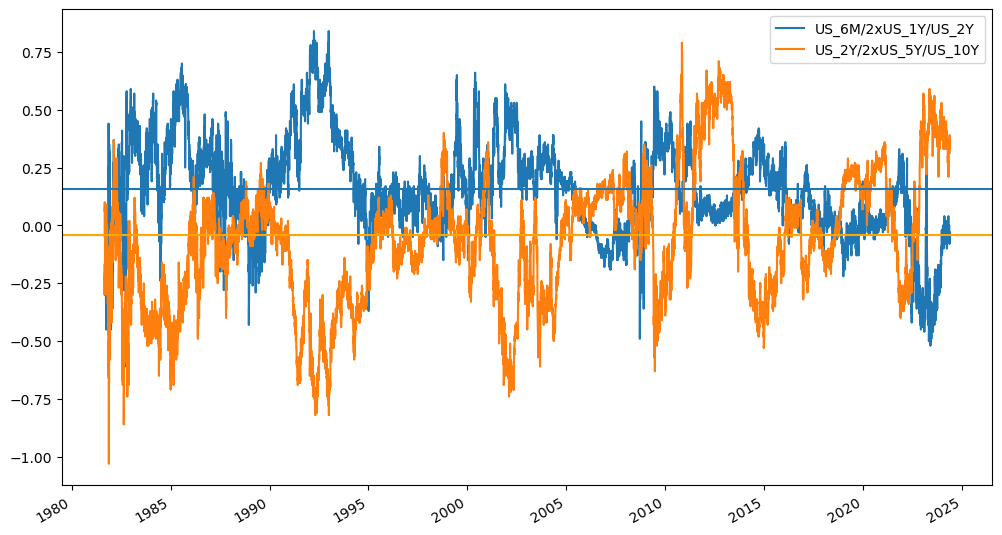

In [51]:
df_flys_trategies.dropna().plot(figsize = (12, 7))
plt.axhline(y = mean_US_6M_2xUS_1Y_US_2Y)
plt.axhline(y = mean_US_2Y_2xUS_5Y_US_10Y, color = 'orange')

#### Those measures are mean reverse measures. The blue horizontal line represents the mean value of the fly strategy US_6M/2xUS_1Y/US_2Y and the orange horizontal line represents the mean value of the fly strategy US_2Y/2xUS_5Y/US_10Y .